
1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)


**Load data**

In [ ]:
import pandas as pd
uncleaned_data = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")
uncleaned_data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
uncleaned_data.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [ ]:
uncleaned_data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [ ]:
uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
#Load stop words
stop = pd.read_csv('stopwords.txt', encoding = "ISO-8859-1")
stop.head()

,x
0,0001f923
1,a
2,a's
3,able
4,about


**Data Cleaning**

In [ ]:
#Remove the Unnamed: 0 column because it is unnecessary
uncleaned_data = uncleaned_data.drop('Unnamed: 0', axis=1)

In [ ]:
uncleaned_data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [ ]:
raw_tweets = uncleaned_data.copy()

In [ ]:
#Remove all types of punctuations, numbers, special characters and lower letters
import re #regular expression
import string

def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)
    text = text.lower()
    return text

raw_tweets['Text'] = uncleaned_data['Text'].apply(clean_text)
raw_tweets

,Text
0,im an alien
1,ray tracing on cyberpunk with hdr is next-lev...
2,great interview!
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,"true, it sounds so surreal, but the negative ..."
1995,make sure to read ur terms &amp; conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is <u+0001f525><u+0001f...


In [ ]:
def thorough_clean(text):
  text = re.sub('[^A-Za-z0-9]', ' ', text)
  return(text)

raw_tweets['Text'] = raw_tweets['Text'].apply(thorough_clean)
raw_tweets

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next lev...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,true it sounds so surreal but the negative ...
1995,make sure to read ur terms amp conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f...


In [ ]:
#Word frequency of raw_tweets
freq_uncleaned = pd.Series(' '.join(raw_tweets['Text']).split()).value_counts()[:20] # for top 20
freq_uncleaned

the     487
to      400
a       357
is      356
u       319
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
dtype: int64

In [ ]:
# Assuming stop is your list of stop words

# Remove leading and trailing whitespace from each word
stop = [word.strip() for word in stop]

# Remove any empty strings
stop = [word for word in stop if word]

# Now stop should be cleaned
print(stop[0:10])  # Print the first 10 words to verify


['x']


In [ ]:
final_tweets = raw_tweets.copy()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
#removing stopwords

final_tweets['Text'] = raw_tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
final_tweets

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next leve...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execut...
...,...
1994,true it sounds so surreal but the negative pro...
1995,make sure to read ur terms amp conditions befo...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f525


In [ ]:
#word frequency after removal of stopwords
freq_cleaned = pd.Series(' '.join(final_tweets['Text']).split()).value_counts()[:20] # for top 20
freq_cleaned

the     487
to      400
a       357
is      356
u       319
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X = vectorizer.fit_transform(final_tweets["Text"])

# Get feature names from the vocabulary
feature_names = vectorizer.get_feature_names_out()

# Calculate word occurrences
word_occurrences = np.asarray(X.sum(axis=0)).ravel().tolist()

# Create a DataFrame
word_freq_df = pd.DataFrame({'term': feature_names, 'occurrences': word_occurrences})

# Calculate word frequency
word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_occurrences)


In [ ]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

     term  occurrences  frequency
3526  the          487   0.029033
3578   to          400   0.023846
1931   is          356   0.021223
2454   of          315   0.018779
1827   in          221   0.013175


<ipython-input-77-1d3ff504b794>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=75,labels = word_freq_df.sort_values('frequency', ascending=False).term)


Text(0.5, 1.07, 'Most frequently used words by elon in tweets')

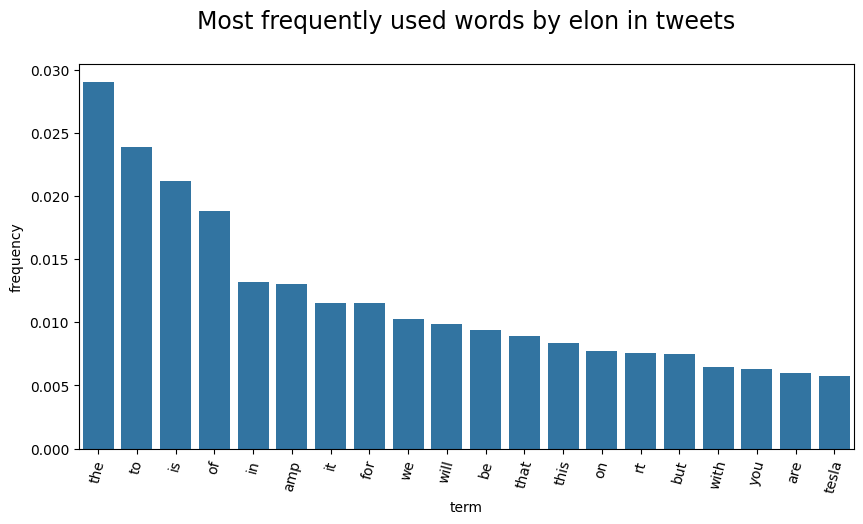

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x="term",y="frequency", data= word_freq_df.sort_values('frequency', ascending = False)[0:20:])
plot.set_xticklabels(rotation=75,labels = word_freq_df.sort_values('frequency', ascending=False).term)
plt.title("Most frequently used words by elon in tweets", y = 1.07, fontsize = 17)

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(final_tweets["Text"])

# Get feature names from the vocabulary
feature_names = vectorizer.get_feature_names_out()

dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)


In [ ]:
df.head(10)

,000,0001f1e9,0001f1ea,0001f339,0001f3b6,0001f440,0001f44c,0001f44d,0001f495,0001f4ab,...,wrong,ya,yeah,year,years,yes,yesterday,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.402126,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.523859,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


**Ngrams**

In [ ]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
top2_words = get_top_n2_words(final_tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,will be,51
1,of the,47
2,this is,36
3,in the,36
4,0001f923 0001f923,35


<ipython-input-82-4157ebb91251>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])


Text(0.5, 1.05, 'Most two words used together in tweets by elon')

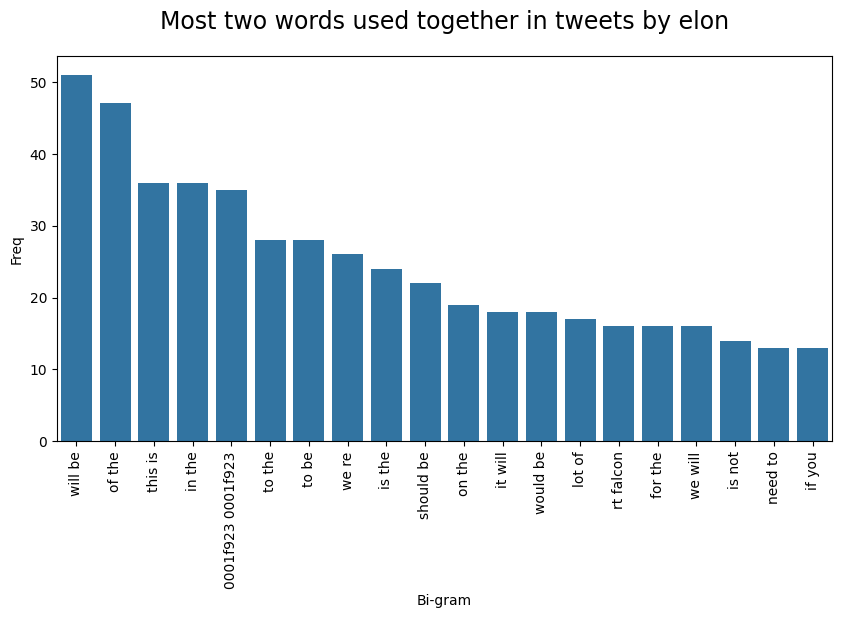

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])
plt.title("Most two words used together in tweets by elon", y=1.05, fontsize=17)

In [ ]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(final_tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
top3_df

,Tri-gram,Freq
0,falcon first stage,9
1,it will be,8
2,rt falcon first,8
3,of course still,7
4,course still love,7
...,...,...
195,in south texas,2
196,cargo resupply mission,2
197,docks to the,2
198,on behalf of,2


<ipython-input-86-5d4dce2e094e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])


Text(0.5, 1.05, 'Most three words used together in tweets by elon')

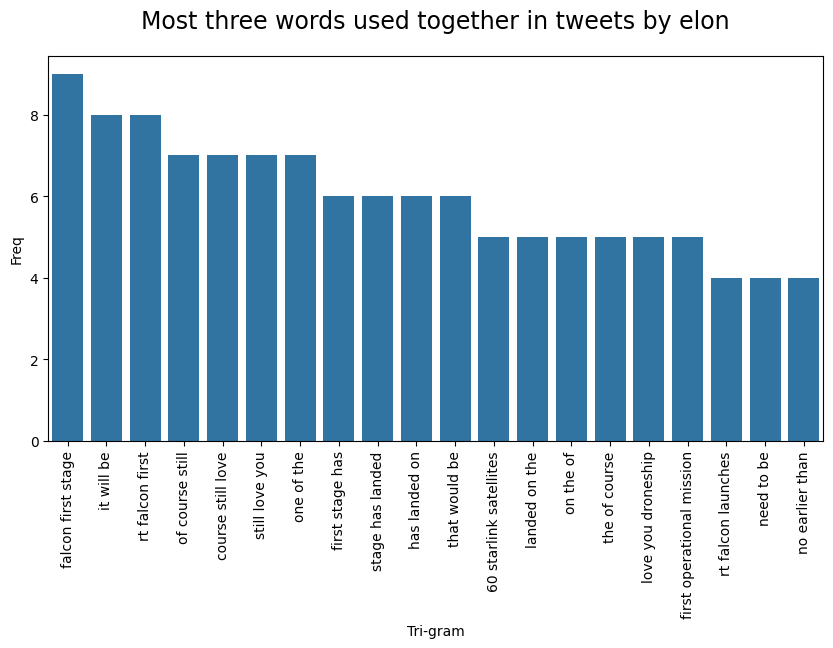

In [ ]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])
plt.title("Most three words used together in tweets by elon", y=1.05, fontsize=17)

In [ ]:
string_Total = " ".join(final_tweets["Text"])

Text(0.5, 1.07, "Wordcloud of the words used in elon's tweets")

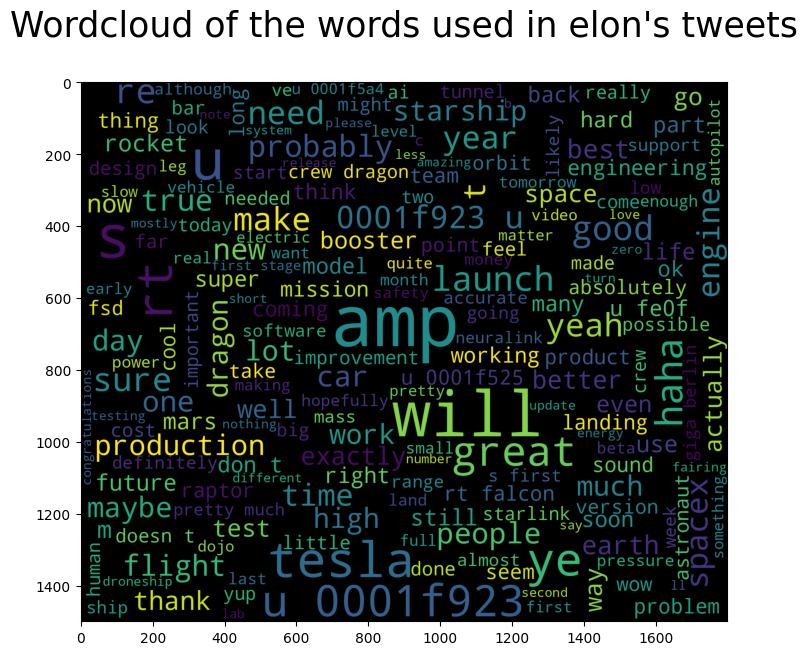

In [ ]:
#wordcloud for entire corpus
fig = plt.figure(figsize = (15,7))
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500, random_state = 10, max_font_size = 200
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.title("Wordcloud of the words used in elon's tweets", y=1.07, fontsize=25)

**Named Entity Recognition**

In [ ]:
import string # special operations on strings
import spacy # language models

In [ ]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = final_tweets.Text.iloc[20]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:
for token in doc_block[0:1999]:                                         #POS tagging for all the cleaned data
    print(token, token.pos_)

any DET
crypto ADJ
wallet NOUN
that PRON
won VERB
t NOUN
give VERB
you PRON
your PRON
private ADJ
keys NOUN
should AUX
be AUX
avoided VERB
at ADP
all DET
costs NOUN


In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print("Nouns and verbs in our cleaned data:", nouns_verbs[0:1999])

Nouns and verbs in our cleaned data: ['wallet', 'won', 't', 'give', 'keys', 'avoided', 'costs']


In [ ]:
one_block1 = uncleaned_data.Text.loc[4]                                                           #We will use POS tagging on uncleaned data, as it gives better reults
doc_block1 = nlp(one_block1)
spacy.displacy.render(doc_block1, style='ent', jupyter=True)

In [ ]:
for token in doc_block1[0:1999]:                                         #POS tagging for all the uncleaned data
    print(token, token.pos_)

@teslacn PROPN
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADP
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT


In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block1 if token.pos_ in ('NOUN', 'VERB')]
print("Nouns and verbs in our uncleaned data:", nouns_verbs[0:1999])

Nouns and verbs in our uncleaned data: ['execution', 'year']


**Sentimental Analysis**

In [ ]:
final_tweets

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next leve...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execut...
...,...
1994,true it sounds so surreal but the negative pro...
1995,make sure to read ur terms amp conditions befo...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f525


In [ ]:
#create function to get subjective and polarity of tweets
from textblob import TextBlob

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

final_tweets['subjectivity'] = final_tweets['Text'].apply(get_subjectivity)
final_tweets['polarity'] = final_tweets['Text'].apply(get_polarity)
final_tweets

,Text,subjectivity,polarity
0,i m an alien,0.750000,-0.250000
1,ray tracing on cyberpunk with hdr is next leve...,0.000000,0.000000
2,great interview,0.750000,0.800000
3,doge is underestimated,0.000000,0.000000
4,congratulations tesla china for amazing execut...,0.366667,0.275000
...,...,...,...
1994,true it sounds so surreal but the negative pro...,0.508333,0.111111
1995,make sure to read ur terms amp conditions befo...,0.888889,0.500000
1996,samwise gamgee,0.000000,0.000000
1997,altho dumb and dumber is u 0001f525 u 0001f525,0.500000,-0.375000


In [ ]:
#create a function for negative, neutral, positive analysis
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
      return 'Positive'

final_tweets['Analysis'] = final_tweets['polarity'].apply(getanalysis)
final_tweets


,Text,subjectivity,polarity,Analysis
0,i m an alien,0.750000,-0.250000,Negative
1,ray tracing on cyberpunk with hdr is next leve...,0.000000,0.000000,Neutral
2,great interview,0.750000,0.800000,Positive
3,doge is underestimated,0.000000,0.000000,Neutral
4,congratulations tesla china for amazing execut...,0.366667,0.275000,Positive
...,...,...,...,...
1994,true it sounds so surreal but the negative pro...,0.508333,0.111111,Positive
1995,make sure to read ur terms amp conditions befo...,0.888889,0.500000,Positive
1996,samwise gamgee,0.000000,0.000000,Neutral
1997,altho dumb and dumber is u 0001f525 u 0001f525,0.500000,-0.375000,Negative


In [ ]:
#print all positive tweets from most positive to least positive
positive_tweets = final_tweets[final_tweets['Analysis'] == 'Positive']
positive_tweets = positive_tweets.sort_values('polarity', ascending = False)
positive_tweets

,Text,subjectivity,polarity,Analysis
340,u 0001f3a9 the greatest gatsby u 0001f3a9,1.000000,1.000000,Positive
1409,a nightcap would probably work best,0.300000,1.000000,Positive
1080,one of the best shots ever,0.300000,1.000000,Positive
781,rt rumor has it that austin chalk is geologica...,0.300000,1.000000,Positive
1818,another government stimulus package is not in ...,0.300000,1.000000,Positive
...,...,...,...,...
1581,yes we re labeling bumps amp potholes so the c...,0.396296,0.014815,Positive
150,unlike its aircraft division which is fine the...,0.450000,0.008333,Positive
304,probably less than a few dozen primary decisio...,0.416667,0.008333,Positive
1073,prototypes are a piece of cake but high volume...,0.512071,0.001566,Positive


In [ ]:
#print all negative tweets from most negative to least negative
negative_tweets = final_tweets[final_tweets['Analysis'] == 'Negative']
negative_tweets = negative_tweets.sort_values('polarity', ascending = True)
negative_tweets

,Text,subjectivity,polarity,Analysis
1265,it will be very insane,1.000000,-1.000000e+00,Negative
1660,rt we are going to go to the moon we are going...,1.000000,-8.000000e-01,Negative
405,the writing on cobra kai is sick u 0001f44c,0.857143,-7.142857e-01,Negative
303,his sick beats,0.857143,-7.142857e-01,Negative
1573,i want to do electric vtol supersonic sooo bad...,0.666667,-7.000000e-01,Negative
...,...,...,...,...
881,well being a phased array antenna it is actual...,0.112500,-1.250000e-02,Negative
613,to be clear this was just an xpeng problem oth...,0.379167,-1.250000e-02,Negative
1416,giant gap between experimental medical device ...,0.566667,-4.166667e-03,Negative
746,would be great to hear from people who know a ...,0.650000,-1.850372e-17,Negative


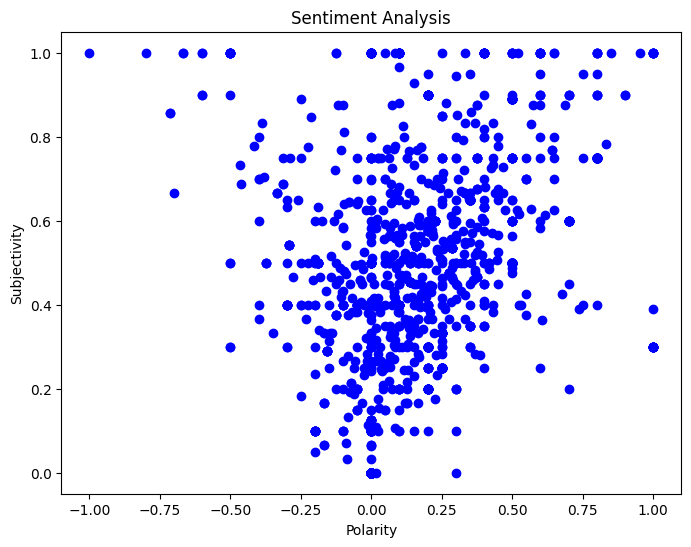

In [ ]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, final_tweets.shape[0]):
  plt.scatter(final_tweets.polarity[i], final_tweets.subjectivity[i], color = 'blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



- Majority of points lie from right of 0.0 of x-axis(Polarity).

In [ ]:
#Get % of positive, negative, neutral tweets
print("% of positive tweets:", round((positive_tweets.shape[0]/final_tweets.shape[0])*100, 1))
print("% of negative tweets:", round((negative_tweets.shape[0]/final_tweets.shape[0])*100, 1))

% of positive tweets: 44.7
% of negative tweets: 11.1


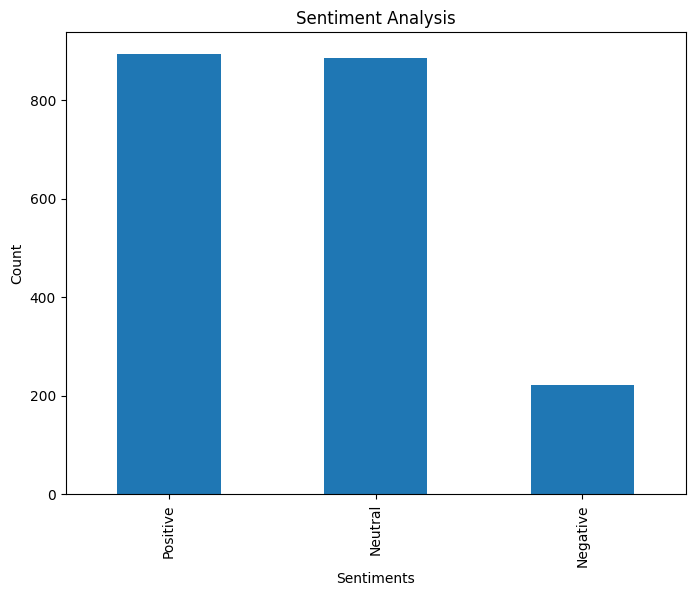

In [ ]:
plt.figure(figsize=(8,6))
final_tweets['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()